In [204]:
import numpy as np
import pandas as pd
import sympy as sym

In [205]:
import scipy as sp

In [2]:
sym.init_printing()

# Dynamics of a double pendulum

The system can be described by the two centers of masses $m_1$, $m_2$ resp. $\vec{r}_1=\begin{pmatrix}x_1 \\ y_1\end{pmatrix}$, $\vec{r}_2=\begin{pmatrix}x_2 \\ y_2\end{pmatrix}$

As the two arms of the pendulum are of constant length $l_1$, $l_2$ it is convient to described the system by the two angles $\theta_1$ and $\theta_2$.

In this case we have

$x_1 = l_1\cos{\theta_1}$, $y_1 = l_1\sin{\theta_1}$ 

$x_2 = x_1 + l_2\cos{\theta_2} = l_1\cos{\theta_1} + l_2\cos{\theta_2}$, $y_2 = y_1 + l_2\sin{\theta_2} = l_1\sin{\theta_1}+ l_2\sin{\theta_2}$

In [82]:
x1, x2, y1, y2 = sym.symbols("x_1, x_2, y_1, y_2")

In [3]:
l1, l2, m1, m2, t1, t2 = sym.symbols("l_1, l_2, m_1, m_2, theta_1, theta_2")

In [83]:
w1, w2 = sym.symbols("omega_1, omega_2")

In [90]:
x1 = l1*sym.cos(t1)
y1 = l1*sym.sin(t1)
x2 = x1 + l2*sym.cos(t2)
y2 = y1 + l2*sym.sin(t2)

In [91]:
r1 = sym.V([[x1],[y1]])
r2 = sym.Matrix([[x2],[y2]])

In [116]:
dr1dt = r1.diff(t1)*w1

In [117]:
dr2dt = (r2.diff(t1)*w1+r2.diff(t2)*w2)

In [118]:
(dr1dt[0]**2+dr1dt[1]**2).simplify()

In [119]:
(dr2dt[0]**2+dr2dt[1]**2).simplify()

## Kinentic Energy

The kinetic energy of the system is accordingly composed of the to terms

$ T = T_1 + T_2$ 

with $ T_1 = \frac{1}{2}m_1\dot{\vec{r}}_1^2 = \frac{1}{2}m_1\begin{pmatrix}-l_1\dot{\theta_1}\cos{\theta_1} \\ l_1\dot{\theta_1}\cos{\theta_1}\end{pmatrix}^2 = \frac{1}{2}m_1l_1^2\dot{\theta_1}^2$

and $ T_2 = \frac{1}{2}m_2\dot{\vec{r}}_2^2 = \frac{1}{2}m_2\left(\dot{\vec{r}}_1+\begin{pmatrix}-l_2\dot{\theta_2}\cos{\theta_2} \\ l_2\dot{\theta_2}\cos{\theta_2}\end{pmatrix}\right)^2 = \frac{1}{2}m_2l_1^2\dot{\theta_1}^2+ \frac{1}{2}m_2l_2^2\dot{\theta_2}^2+ m_2l_2l_1\dot{\theta_1}\dot{\theta_2}\cos{\left(\theta_1-\theta_2\right)}$

$T = \frac{1}{2}(m_1+m_2)l_1^2\dot{\theta_1}^2+ \frac{1}{2}m_2l_2^2\dot{\theta_2}^2+ m_2l_2l_1\dot{\theta_1}\dot{\theta_2}\cos{\left(\theta_1-\theta_2\right)}$

In [29]:
T = 1/2*(m1 + m2)*l1**2*w1**2 + 1/2*m2*l2**2*w2**2 + m2*l1*l2*w1*w2*sym.cos(t1-t2)
T

In [128]:
T = ((m1*(dr1dt[0]**2+dr1dt[1]**2)/2+m2*(dr2dt[0]**2+dr2dt[1]**2)/2)).simplify()

## Potential energy

The potential energy of a mass $m$ in the field of gravity is $V = m\cdot g \cdot h$ where $g\approx \mathrm{9.81}\frac{\mathrm{m}}{\mathrm{s}^2}$ is the earth gravity

This yields the two contribution from the two pendulum's masses

$V = V_1+V_2$

with $V_1 = m_1gl_1\sin\theta_1$

and $V_2 = m_2g\left(l_1\sin\theta_1+l_2\sin\theta_2\right)$


$V = (m_1+m_2)gl_1\sin\theta_1+m_2gl_2\sin\theta_2$

In [129]:
g = sym.symbols("g")

In [130]:
V = (m1 + m2)*g*l1*sym.sin(t1) + m2*g*l2*sym.sin(t2)

## Lagrangian

The dynamics can therefor be described by the Langrangian $L = T-V$ where we use the general coordinates $q_1:=\theta_1$ and $q_2:=\theta_2$

$L = \frac{1}{2}(m_1+m_2)l_1^2\dot{q_1}^2+ \frac{1}{2}m_2l_2^2\dot{q_2}^2+m_2l_2l_1\dot{q_1}\dot{q_2}\cos{\left(q_1-q_2\right)} - (m_1+m_2)gl_1\sin q_1+m_2gl_2\sin q_2$

In [131]:
L = T-V

In [132]:
q1, q2 = sym.symbols("q_1 q_2")

In [133]:
L = L.subs({t1:q1,t2:q2})

### Generalized momenta

The generalized momenta for the general coordinates are given by the paritial derivatives 

$p_1 = \frac{\partial L}{\partial \dot{q}_1}$ and $p_2 = \frac{\partial L}{\partial \dot{q}_2}$

$p_1 = l_1^2(m_1+m_2)\dot{q}_1+l_1l_2m_2\cos{(q_1-q_2)}\dot{q}_2$

$p_2 = l_1l_2m_2\cos{(q_1-q_2)}\dot{q}_1+l_2^2m_2\dot{q}_2$

In [134]:
p1 = sym.Derivative(L,w1).doit().simplify()
p2 = sym.Derivative(L,w2).doit().simplify()

In [135]:
p2

In [136]:
p1

## Hamiltonian

For getting the Hamiltonian $H=H\left(q_i,p_i\right)$ of the system we have to invert the generalized momenta to be expressed in terms of $p_i=p_i\left(q_i,\dot{q}_i\right)$. 

In order to to the we notice the following:

$p = \begin{pmatrix} p_1 \\ p_2 \end{pmatrix} = B \cdot \begin{pmatrix}\dot{q}_1 \\ \dot{p}_2\end{pmatrix}$

$\begin{pmatrix}\dot{q}_1 \\ \dot{p}_2\end{pmatrix} = B^{-1}\cdot p$

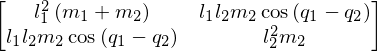

In [137]:
B = sym.Matrix([[l1**2*(m1+m2), l1*l2*m2*sym.cos(q1-q2)],
           [l1*l2*m2*sym.cos(q1-q2), l2**2*m2]])
B

We can invert this relation by inverting the matrix

In [138]:
p1, p2 = sym.symbols('p_1 p_2')

In [139]:
w = B.inv()*sym.Matrix([[p1],[p2]])

Now we can apply the Legendre-Transformation $H\left(q_i,p_i\right)=\sum_{i=1}^{n}\dot{q}_ip_i - L\left(q_i, \dot{q}_i\left(q_i,p_i\right)\right)$

In [438]:
H = p1*w[0]+p2*w[1]-L.subs({w1:w[0],w2:w[1]}).simplify()

# Equations of Motion

The equations of motion can be derived from the Hamiltonion by

$\dot{q}_i=\frac{\partial H}{\partial p_i}$

$\dot{p}_i=-\frac{\partial H}{\partial q_i}$

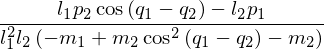

In [439]:
dq1dt = sym.Derivative(H,p1).doit().simplify()
dq1dt

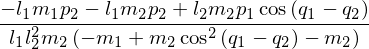

In [440]:
dq2dt = sym.Derivative(H,p2).doit().simplify()
dq2dt

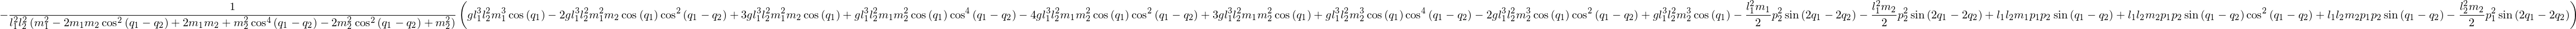

In [441]:
dp1dt = -sym.Derivative(H,q1).doit().simplify()
dp1dt

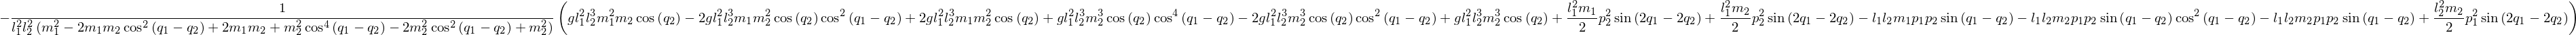

In [442]:
dp2dt = -sym.Derivative(H,q2).doit().simplify()
dp2dt

In [443]:
eom = sym.Matrix([dq1dt,dq2dt,dp1dt,dp2dt])

## Symmetric pendulum

In [333]:
l, m = sym.symbols('l, m')

In [334]:
Hsym = H.subs({m1:m,m2:m,l1:l,l2:l}).simplify()

In [335]:
eom_sym = sym.Matrix([Hsym.diff(p1).simplify(),Hsym.diff(p2).simplify(),-Hsym.diff(q1).simplify(),-Hsym.diff(q2).simplify()])

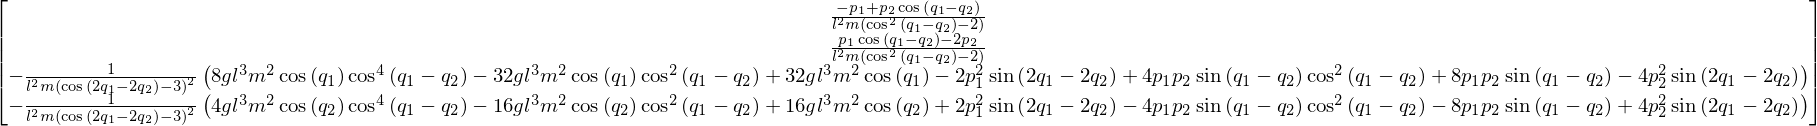

In [336]:
eom_sym

# Numerical Simulation

In [337]:
from sympy.utilities.autowrap import ufuncify

In [338]:
import scipy.integrate

In [625]:
class DoublePendulum(sp.integrate.RK45):
    def __init__(self, 
                 t_bound, 
                 length1, 
                 length2,
                 mass1,
                 mass2,
                 gravity=10, 
                 q1_0=0, q2_0=0, dq1dt_0=0, dq2dt_0=0, 
                 max_step=1):
        
        # reduce with symmetric length and mass and set the parameters
        
        # coordinates
        self.coords_expr = sym.Matrix([x1,y1,x2,y2]).subs({m1:mass1,m2:mass2,l1:length1,l2:length2, t1:q1, t2:q2})
        self.coords_num = [ufuncify([q1,q2],e) for e in self.coords_expr]
        
        #self.H_expr = H.subs({m1:mass1,m2:mass2,l1:length1,l2:length2,g:gravity}).simplify()
        #self.B_expr = B.subs({m1:mass1,m2:mass2,l1:length1,l2:length2})
        
        self.eom = eom.subs({m1:mass1,m2:mass2,l1:length1,l2:length2,g:gravity})
        self.H = H.subs({m1:mass1,m2:mass2,l1:length1,l2:length2,g:gravity})
        
        self.eom_num = [ufuncify([q1,q2,p1,p2],e) for e in self.eom]
        self.H_num = ufuncify([q1,q2,p1,p2],self.H)
        
        # calculate initial generalized momentum
        
        self.PQ = B.subs({m1:mass1,m2:mass2,l1:length1,l2:length2,g:gravity})
        self.invPQ = self.PQ.inv() * sym.Matrix([[p1],[p2]])
        self.invPQ_num = [ufuncify([q1,q2,p1,p2],pq) for pq in self.invPQ]
        
        p0 = self.PQ * sym.Matrix([[dq1dt_0],[dq2dt_0]])
        
        sp.integrate.RK45.__init__(self,
                                   self.grad,
                                   0,[q1_0, q2_0, p0[0], p0[1]],
                                   max_step=max_step,
                                   t_bound=t_bound,
                                   vectorized=True)
        self.y_old_old = None
    
    def w(self):
        return self.invPQ_num[0](*self.y), self.invPQ_num[1](*self.y)
    
    def energy(self):
        return self.H_num(*self.y)
    
    
    def coords(self):
        return [c(self.y[0],self.y[1]) for c in self.coords_num]
    
    def grad(self, t, y):
        """ q1, q2, p1, p2 """
        return np.vstack(e(y[0,:],y[1,:],y[2,:],y[3,:]) for e in self.eom_num)
    
    def sos(self):
        if (self.y_old is None) and (self.y[2]==0):
            return True
        return (abs(self.y[2])<2) and (abs(self.y_old[2])<abs(self.y[2])) and (abs(self.y_old_old[2])>abs(self.y_old[2]))
    
    def step(self):
        if self.y_old is not None:
            self.y_old_old = np.copy(self.y_old)
        else:
            self.y_old_old = np.copy(self.y)
        return sp.integrate.RK45.step(self)
            

# Animation

In [626]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [627]:
from matplotlib import animation, rc
from IPython.display import HTML, Image, Markdown

In [641]:
def animate_double_pendulum(t_max, length1, length2, mass1, mass2, gravity=10, q1_0=0, q2_0=0, dq1dt_0=0, dq2dt_0=0, t_frame=0.02):
    
    
    print('preparing equations of motion...')
    pend = DoublePendulum(t_max, length1, length2, mass1, mass2, gravity, q1_0, q2_0, dq1dt_0, dq2dt_0, max_step=t_frame)
        
    # First set up the figure, the axis, and the plot element we want to animate
    plt.close('all')
    fig = plt.figure()

    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[3, 1])
    
    ax = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[1,:])
    ax3 = plt.subplot(gs[0,1])
    
    ax.set_aspect('equal')
    lim = (length1+length2)*1.1
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    
    ax3.set_aspect('equal')
    ax3.set_xlim(-2.2, 2.2)
    ax3.set_ylim(-2.2, 2.2)
    ax3.yaxis.tick_right()
    ax3.yaxis.set_label_position("right")
    ax3.set_xlabel(r"$\theta_1$[$\pi$]")
    ax3.set_ylabel(r"$\theta_2$[$\pi$]")
    
    #ax3.set_xlim(-1, 11)
    #ax3.set_ylim(-1, 5)

    points_sos, = ax3.plot([np.mod(pend.y[0],2*np.pi)/np.pi],
                           [np.mod(pend.y[1],2*np.pi)/np.pi], 
                           marker='.', linestyle='', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0], markersize=6) # [0],[abs(pend.y[2])]
    
    points, = ax.plot([0],[3./4*(length1+length2)], marker='.', linestyle='', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0], markersize=2)
    
    coords = pend.coords()
    line1, = ax.plot([0,coords[0]],[0,coords[1]], marker='o',markersize=mass1*2)
    line2, = ax.plot([coords[0],coords[2]],[coords[1],coords[3]], marker='o',markersize=mass2*2)
    
    momentum1, = ax2.plot(pend.t,pend.w()[0]/np.pi)
    momentum2, = ax2.plot(pend.t,pend.w()[1]/np.pi)
    ax2.set_xlim(0,t_max)
    ax2.set_ylim(-5,5)
    ax2.set_xlabel('t [s]')
    ax2.set_ylabel(r'$\dot{\theta}$ [$\pi$s$^{-1}$]')
    
    fig.suptitle('Double Pendulum with E={:.2f} J'.format(pend.energy()))
    
    def update_pendulum(pend):
        x1, y1, x2, y2 = pend.coords()
        line1.set_data([0,x1], [0,y1])
        line2.set_data([x1,x2], [y1,y2])
        x, y = points.get_data()
        points.set_data(x +[x2],y +[y2])
        return line1, line2, points
    
    # initialization function: plot the background of each frame
    def init2():
        line1.set_data([], [])
        line2.set_data([], [])
        
        points.set_data([],[])
        momentum1.set_data([],[])
        momentum2.set_data([],[])
        points_sos.set_data([],[])

        return (line1, line2, points, momentum1, momentum2, points_sos,)


    # animation function. This is called sequentially
    def animate2(i):
        
        pend.step()
        
        line1, line2, points = update_pendulum(pend)
        
        for line,pv in zip([momentum1,momentum2],pend.w()):
            x,y  = line.get_data()
            line.set_data(x+[pend.t],y+[pv/np.pi])
        
        if pend.sos():
            x,y  = points_sos.get_data()
            points_sos.set_data(x+[np.mod(pend.y[0],2*np.pi)/np.pi],
                                y+[np.mod(pend.y[1],2*np.pi)/np.pi]) # x+[pend.t],y+[abs(pend.y[2])]
        
        return (line1, line2, points, momentum1, momentum2, points_sos,)
    
    print('preparing animation...')
    anim = animation.FuncAnimation(fig, animate2, init_func=init2, frames=int(t_max/t_frame), interval=int(1000*t_frame), blit=True)
       
    print('rendering video...')
    return anim.to_html5_video()

In [566]:
HTML(animate_double_pendulum(10, 1, 1, 5, 1, gravity=9.81, q1_0=np.pi/5, q2_0=np.pi/7))

In [ ]:
HTML(animate_double_pendulum(120, 1, 1, 3, 3, gravity=9.81, q1_0=np.pi/5, q2_0=np.pi/7))

preparing equations of motion...
